In [1]:
!pip install -U transformers[torch]
!pip install -U huggingface_hub
!pip install evaluate
!pip install sacrebleu
!pip install rouge_score
!pip install -U nltk
#!pip install bitsandbytes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 68.6 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: transformers
    Found existing installation: transformers 4.42.3
    Uninstalling transformers-4.42.3:
      Successfully uninstalled transformers-4.42.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.5/417.5 kB 10.8 MB/s eta 0:00:0000:01
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.23.4
    Uninstalling huggingface-hub-0.23.4:
      Successfully uninstalled huggingface-hub-0.23.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=90

In [2]:
!git clone https://github.com/ryanzhumich/AESLC

Cloning into 'AESLC'...
remote: Enumerating objects: 17469, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 17469 (delta 1), reused 0 (delta 0), pack-reused 17461 (from 1)
Receiving objects: 100% (17469/17469), 7.36 MiB | 20.53 MiB/s, done.
Resolving deltas: 100% (48/48), done.


In [3]:
#!ls
!ls AESLC/enron_subject_line

dev  test  train


In [4]:
train_path = './AESLC/enron_subject_line/train'
val_path = './AESLC/enron_subject_line/dev'
test_path = './AESLC/enron_subject_line/test'

In [5]:
import pandas as pd
import os

In [6]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [7]:
df = pd.DataFrame(columns=["Email", "Subject"])

for filename in os.listdir(train_path):
    with open(os.path.join(train_path,filename)) as f:
        content = f.read().split('@subject\n')
        df = pd.concat([df, pd.DataFrame.from_records([{"Email": content[0], "Subject": content[1]}])], ignore_index = True)

df

,Email,Subject
0,Please join us for a celebration of Energy Ope...,Invitation to Promotions Social
1,"Venona, Attached is a revised list of ""Specia...",Special Provisions
2,U.S. GEOLOGICAL SURVEY NATIONAL EARTHQUAKE IN...,[EDIS] EQ MAG 4 3 UTAH [News: Statewide]
3,Ms. Buchanan: Attached for your consideration...,Master Draft
4,Reminder The Enron Oral History Project Contin...,Reminder
...,...,...
14431,TheMarket for Lemons and the Price of Dishones...,Newsletter
14432,"Althea, I was trying to get in touch with thi...",Stanford MBA- Interview
14433,We are pleased to announce organizational chan...,Organizational Announcement
14434,Global counterparty is trying to locate online...,Assistance to Global Counterparty


In [8]:
import re

In [9]:
df_val = pd.DataFrame(columns=["Email", "Subject", "Ann0", "Ann1", "Ann2"])
delimiters = r'@subject\n|\n\n@ann0\n|\n\n@ann1\n|\n\n@ann2\n'
for filename in os.listdir(val_path):
    with open(os.path.join(val_path,filename)) as f:
        content_val = f.read()
        split_string = re.split(delimiters,content_val)
        df_val = pd.concat([df_val,pd.DataFrame.from_records([{"Email": split_string[0], "Subject": split_string[1], "Ann0" : split_string[2], "Ann1" : split_string[3], "Ann2" : split_string[4]}])], ignore_index = True)

df_val

,Email,Subject,Ann0,Ann1,Ann2
0,Miguel: There are some Oasis request for SOCO...,Missing Transmission Deal,what are the deal numbers?,need deal numbers missing in enpower. need res...,soco deals are missing in enpower
1,"As most people are aware, there are a variety ...",Data Retention Reminder,important policy information,data retention policy,investigations pertaining to the western whole...
2,"Dear Ken, I wrote you some time back about th...",American Heart Association,asking for your assistance in a time of need,still need $2-$2.25 million,american heart association hq rebuild
3,Please take a look at deal 372088.\nIts a new ...,ODD CES deal,deal 372088,deal 372088 - please take a look,new deal starting september 1st
4,Tight time frame for Mike & co. on metals deli...,Merchanting Metals Update #2,metals time frame,time frame for mike & co.,timing of next week's visit on metal
...,...,...,...,...,...
1955,See attached copy of updated spreadsheet.\nApp...,Updated Spreadsheet for Pricing Disruption,spreadsheet and negotiations,updated spreadsheet and needed negotiations,updated spreadsheet
1956,Please respond to Sivy on Stocks SIVY ON STOCK...,Sivy on Stocks: The rebound begins,respond to michael sivy on stocks,sivy on stocks response,greenspan's aggressive rate cutting will fuel ...
1957,"For those of you that do not know, we are plan...",Greg's Bachelor Party,rsvp greg's bachelor party,greg's bachelor party,greg's bachelor party confirmation needed
1958,Attached is an executive summary of the NOI on...,Summary of NOI,executive summary of the noi,ferc requesting comments on expansion of servi...,noi executive summary


In [10]:
df_test = pd.DataFrame(columns=["Email", "Subject", "Ann0", "Ann1", "Ann2"])
for filename in os.listdir(test_path):
    with open(os.path.join(test_path,filename)) as f:
        content_test = f.read()
        split_string = re.split(delimiters,content_test)
        df_test = pd.concat([df_test,pd.DataFrame.from_records([{"Email": split_string[0], "Subject": split_string[1], "Ann0" : split_string[2], "Ann1" : split_string[3], "Ann2" : split_string[4]}])], ignore_index = True)

df_test

,Email,Subject,Ann0,Ann1,Ann2
0,Congratulations on the birth of Emma.\nI hope ...,Congratulations,congratulations on the birth of your child!,so happy to hear about the new baby,congrats on baby emma
1,"February 4, 2002 NESA Members: Attached is ou...",Northeast Spring Membership Mixer,nesa northeast spring membership mixer,northeast spring membership mixer information ...,upcoming northeast spring membership mixer and...
2,We have a discount on the ICTS contract #1.879...,Trco ICTS contract,information for icts contract #1.8793,details regarding icts discount,reminder re: our icts contract discount
3,Here is the Open Ticket Remedy Report for Prop...,Property User Group Meeting,open ticket remedy report for property attached,open ticket remedy report for property,open ticket remedy report review
4,To the HR Generalist Community: The Livelink...,Livelink update,hr generalist community,livelink answers to employee questions,livelink team update
...,...,...,...,...,...
1901,Attached is a clean and redlined revised capac...,Revised Capacity Release Agreement,capacity release agreement,capacity release agreement revisions,revised release agreement
1902,Paul: I originally sent this request to Ed bu...,Frontera - ISDA Agreement,need assistance with physical agreement,credit worksheet needed.,credit worksheet for counterparty
1903,I am recommending Linda Robertson (currently A...,Vice President Recommendation,federal government affairs position recommenda...,"recommendation: linda robertson for vp, gm fed...",vice president positioning
1904,Mark; I have already spoken with Brett Wiggs ...,conf call,sa legal group,sa legal group,sa legal group conversation


In [11]:
df.to_csv(r'train.csv')
df_val.to_csv(r'val.csv')
df_test.to_csv(r'test.csv')

In [12]:
!ls

AESLC  test.csv  train.csv  val.csv


In [13]:
import numpy as np

In [14]:
narray = df.to_numpy()
length_checker = np.vectorize(len)

arr_len = length_checker(narray)

arr_len

array([[ 750,   31],
       [ 347,   18],
       [1380,   41],
       ...,
       [1268,   27],
       [ 525,   33],
       [ 646,   24]])

In [15]:
narray_val = df_val.to_numpy()
arr_len_val = length_checker(narray_val)

arr_len_val

array([[ 530,   25,   26,   57,   33],
       [2195,   23,   28,   21,   87],
       [1689,   26,   44,   27,   37],
       ...,
       [1570,   21,   26,   21,   41],
       [ 562,   14,   28,   63,   21],
       [ 151,    6,   16,   26,   31]])

In [16]:
narray_test = df_test.to_numpy()
arr_len_test = length_checker(narray_test)

arr_len_test

array([[222,  15,  43,  35,  21],
       [351,  33,  38,  69,  80],
       [214,  18,  37,  31,  39],
       ...,
       [864,  29,  50,  63,  26],
       [300,   9,  14,  14,  27],
       [122,  47,  43,  13,  31]])

In [17]:
print(np.mean(arr_len, axis = 0))
print(np.mean(arr_len_val, axis = 0))
print(np.mean(arr_len_test, axis = 0))

[790.94444444  26.19278193]
[811.65306122  27.27908163  30.85153061  32.89234694  31.94540816]
[690.8683106   26.97219307  32.62329486  33.64742917  33.27701994]


In [18]:
print(np.median(arr_len, axis = 0))
print(np.median(arr_len_val, axis = 0))
print(np.median(arr_len_test, axis = 0))

[425.  23.]
[443.  23.  28.  30.  29.]
[451.  24.  30.  32.  31.]


In [19]:
df_length = pd.DataFrame(arr_len, columns = ["Email Length", "Subject Length"])
df_length

,Email Length,Subject Length
0,750,31
1,347,18
2,1380,41
3,273,12
4,656,8
...,...,...
14431,2717,10
14432,134,23
14433,1268,27
14434,525,33


In [20]:
df_val_length = pd.DataFrame(arr_len_val, columns = ["Email Length", "Subject Length", "Ann0", "Ann1", "Ann2"])
df_val_length

,Email Length,Subject Length,Ann0,Ann1,Ann2
0,530,25,26,57,33
1,2195,23,28,21,87
2,1689,26,44,27,37
3,165,12,11,32,31
4,190,28,17,25,36
...,...,...,...,...,...
1955,255,42,28,43,19
1956,698,34,33,23,63
1957,1570,21,26,21,41
1958,562,14,28,63,21


In [21]:
df_test_length = pd.DataFrame(arr_len_test, columns = ["Email Length", "Subject Length", "Ann0", "Ann1", "Ann2"])
df_test_length

,Email Length,Subject Length,Ann0,Ann1,Ann2
0,222,15,43,35,21
1,351,33,38,69,80
2,214,18,37,31,39
3,243,27,47,38,32
4,621,15,23,38,20
...,...,...,...,...,...
1901,243,34,26,36,25
1902,257,25,39,24,33
1903,864,29,50,63,26
1904,300,9,14,14,27


In [22]:
df_length.max(axis=0)

Email Length      39003
Subject Length      117
dtype: int64

In [23]:
df_length.min(axis=0)

Email Length      94
Subject Length     1
dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 0, 'Number of Words'),
 Text(0, 0.5, 'Number of Emails'),
 Text(0.5, 1.0, 'Email Length Histogram')]

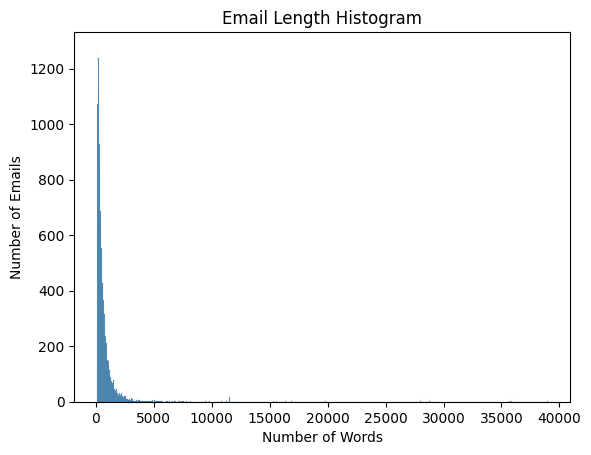

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.histplot(df_length['Email Length'])
ax.set(xlabel = "Number of Words", ylabel = "Number of Emails", title = "Email Length Histogram")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 0, 'Number of Words'),
 Text(0, 0.5, 'Number of Subjects'),
 Text(0.5, 1.0, 'Subject Length Histogram')]

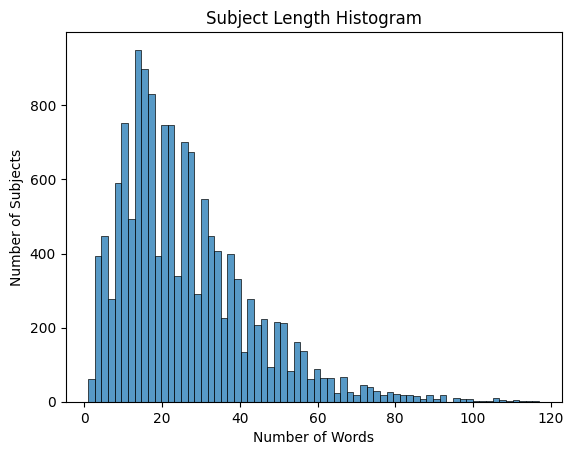

In [25]:
ax = sns.histplot(df_length['Subject Length'])
ax.set(xlabel = "Number of Words", ylabel = "Number of Subjects", title = "Subject Length Histogram")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 0, 'Number of Words'),
 Text(0, 0.5, 'Number of Subjects'),
 Text(0.5, 1.0, 'Subject Length Histogram')]

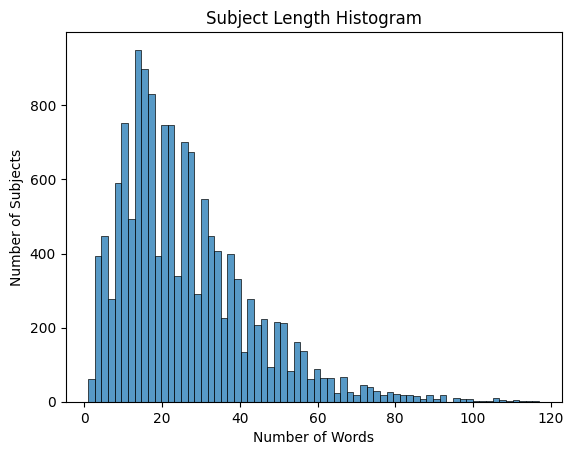

In [26]:
ax = sns.histplot(df_length['Subject Length'])
ax.set(xlabel = "Number of Words", ylabel = "Number of Subjects", title = "Subject Length Histogram")

[Text(0.5, 1.0, 'Correlation between Email Length and Subject Length')]

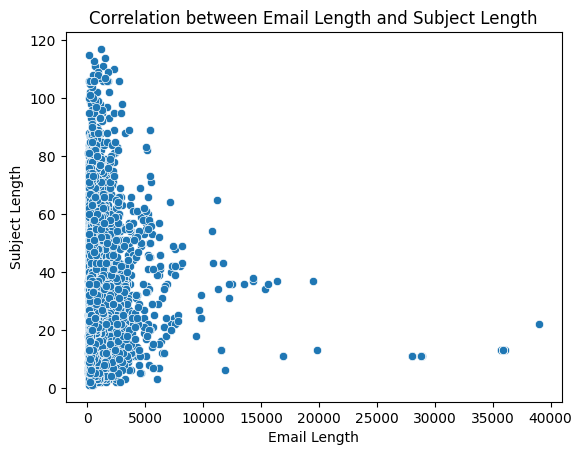

In [27]:
ax = sns.scatterplot(data=df_length, x="Email Length", y="Subject Length")
ax.set(title = "Correlation between Email Length and Subject Length")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


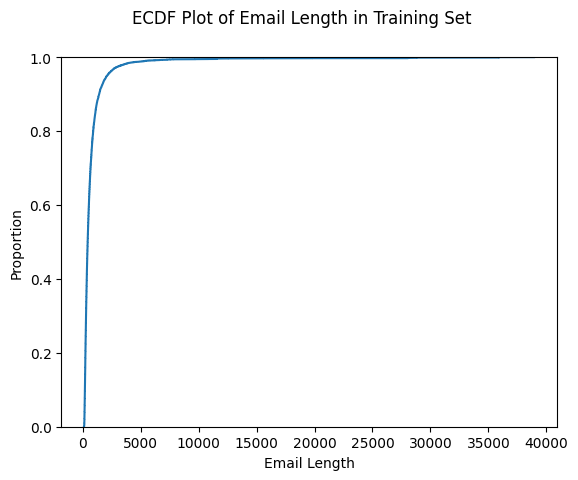

In [28]:
fig = plt.figure()
plt.suptitle("ECDF Plot of Email Length in Training Set")
sns.ecdfplot(data=df_length, x=df_length['Email Length'])
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


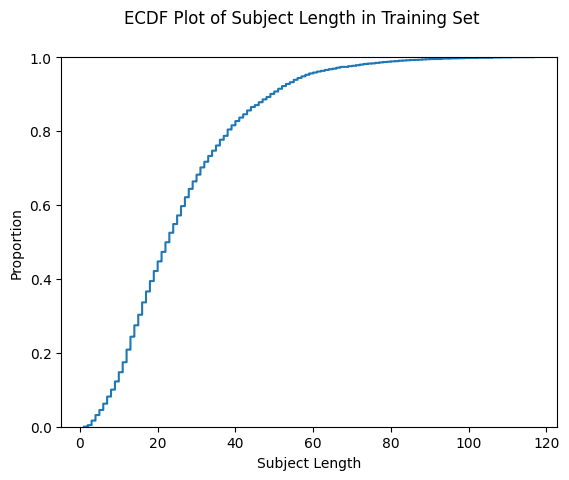

In [29]:
fig = plt.figure()
plt.suptitle("ECDF Plot of Subject Length in Training Set")
sns.ecdfplot(data=df_length, x=df_length['Subject Length'])
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


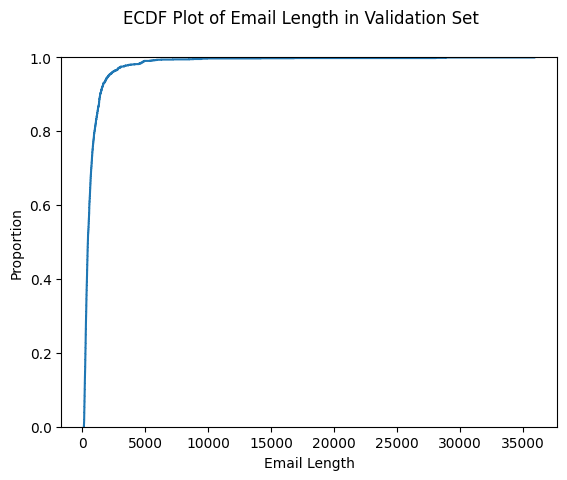

In [30]:
fig = plt.figure()
plt.suptitle("ECDF Plot of Email Length in Validation Set")
sns.ecdfplot(data=df_val_length, x=df_val_length['Email Length'])
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


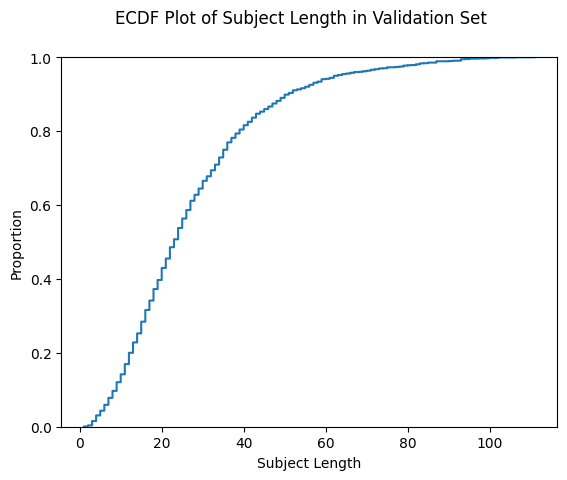

In [31]:
fig = plt.figure()
plt.suptitle("ECDF Plot of Subject Length in Validation Set")
sns.ecdfplot(data=df_val_length, x=df_val_length['Subject Length'])
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

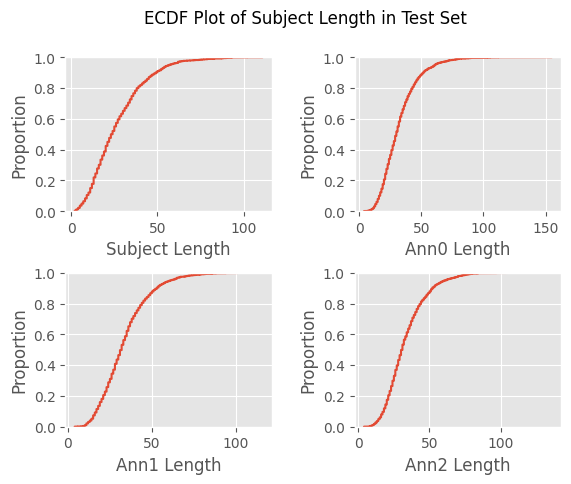

In [32]:
fig = plt.figure()
plt.suptitle("ECDF Plot of Subject Length in Test Set")
plt.style.use('ggplot')
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2, 2, 1)
sns.ecdfplot(data=df_test_length, x=df_test_length['Subject Length'])#,ax=ax)
ax.set(xlabel='Subject Length')
ax = fig.add_subplot(2, 2, 2)
sns.ecdfplot(data=df_test_length, x=df_test_length['Ann0'],ax=ax)
ax.set(xlabel='Ann0 Length')
ax = fig.add_subplot(2, 2, 3)
sns.ecdfplot(data=df_test_length, x=df_test_length['Ann1'],ax=ax)
ax.set(xlabel='Ann1 Length')
ax = fig.add_subplot(2, 2, 4)
sns.ecdfplot(data=df_test_length, x=df_test_length['Ann2'],ax=ax)
ax.set(xlabel='Ann2 Length')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


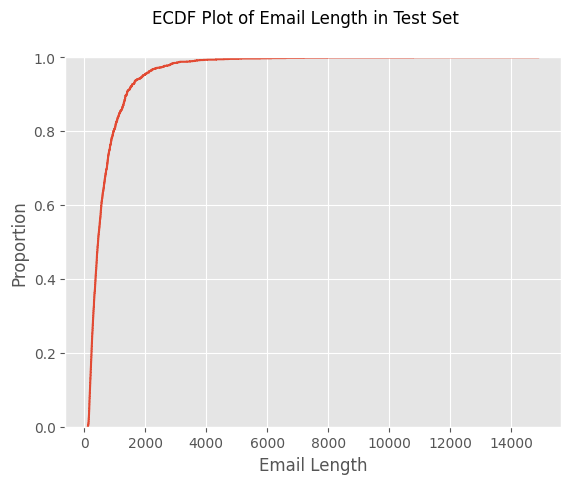

In [33]:
fig = plt.figure()
plt.suptitle("ECDF Plot of Email Length in Test Set")
sns.ecdfplot(data=df_test_length, x=df_test_length['Email Length'])
plt.show()

In [34]:
!ls

AESLC  test.csv  train.csv  val.csv


In [35]:
df = pd.read_csv("train.csv")
df_val = pd.read_csv("val.csv")
df_test = pd.read_csv("test.csv")

In [36]:
df_test.head()

,Unnamed: 0,Email,Subject,Ann0,Ann1,Ann2
0,0,Congratulations on the birth of Emma.\nI hope ...,Congratulations,congratulations on the birth of your child!,so happy to hear about the new baby,congrats on baby emma
1,1,"February 4, 2002 NESA Members: Attached is ou...",Northeast Spring Membership Mixer,nesa northeast spring membership mixer,northeast spring membership mixer information ...,upcoming northeast spring membership mixer and...
2,2,We have a discount on the ICTS contract #1.879...,Trco ICTS contract,information for icts contract #1.8793,details regarding icts discount,reminder re: our icts contract discount
3,3,Here is the Open Ticket Remedy Report for Prop...,Property User Group Meeting,open ticket remedy report for property attached,open ticket remedy report for property,open ticket remedy report review
4,4,To the HR Generalist Community: The Livelink...,Livelink update,hr generalist community,livelink answers to employee questions,livelink team update


In [37]:
print(df.Subject.map(lambda x: len(x)).max())
print(df_val.Subject.map(lambda x: len(x)).max())
print(df_test.Subject.map(lambda x: len(x)).max())

117
111
111


In [38]:
import torch
from torch.utils.data import Dataset, random_split, DataLoader
from transformers import GPT2Tokenizer, TrainingArguments, Trainer, GPT2LMHeadModel, DataCollatorForLanguageModeling #Seq2SeqTrainingArguments, Seq2SeqTrainer
import accelerate
import evaluate
#import bitsandbytes
from torch import nn
from transformers.trainer_pt_utils import get_parameter_names
import re

2024-08-15 10:11:56.673098: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-15 10:11:56.673199: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-15 10:11:56.816375: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [39]:
#!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

In [40]:
sacrebleu = evaluate.load("sacrebleu")
rouge = evaluate.load("rouge")
meteor = evaluate.load("meteor")

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


In [41]:
torch.manual_seed(42)

In [42]:
tokenizer = GPT2Tokenizer.from_pretrained('gpt2-medium', bos_token='<|startoftext|>',
                                          eos_token='<|endoftext|>', pad_token='<|pad|>', sep_token='<|sep|>')
model = GPT2LMHeadModel.from_pretrained('gpt2-medium').cuda()
model.resize_token_embeddings(len(tokenizer))

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Embedding(50260, 1024)

In [43]:
datacollator = DataCollatorForLanguageModeling(tokenizer = tokenizer, mlm=False)

In [44]:
class EmailSubjectDataset(Dataset):
    def __init__(self, data, tokenizer):
        self.input_ids = []
        self.attn_masks = []
        self.labels = []
        for index, row in data.iterrows():
            encodings_dict = tokenizer('<|startoftext|>' + row["Email"] + '<|sep|>' + row["Subject"] + '<|endoftext|>', truncation=True, max_length=250, padding="max_length", return_tensors='pt')
            self.input_ids.append(torch.tensor(encodings_dict['input_ids']))
            self.attn_masks.append(torch.tensor(encodings_dict['attention_mask']))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx]

In [45]:
class ValEmailSubjectDataset(Dataset):
    def __init__(self, data, tokenizer):
        self.input_ids = []
        self.attn_masks = []
        self.labels = []
        for index, row in data.iterrows():
          encodings_dict = tokenizer('<|startoftext|>' + row["Email"] + '<|sep|>', truncation=True, max_length=250, padding="max_length", return_tensors='pt')
          if((encodings_dict['input_ids'][0][249] != torch.Tensor(np.array([50259]))) and (encodings_dict['input_ids'][0][249] != torch.Tensor(np.array([50258])))):
            encodings_dict['input_ids'][0] = torch.cat((encodings_dict['input_ids'][0][np.r_[:249]],torch.Tensor(np.array([50258]))),0)
          self.input_ids.append(torch.tensor(encodings_dict['input_ids']))
          self.attn_masks.append(torch.tensor(encodings_dict['attention_mask']))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx]

In [46]:
class TestEmailSubjectDataset(Dataset):
    def __init__(self, data, tokenizer):
        self.input_ids = []
        self.attn_masks = []
        self.labels = []
        for index, row in data.iterrows():
          encodings_dict = tokenizer('<|startoftext|>' + row["Email"] + '<|sep|>', truncation=True, max_length=250, return_tensors='pt')
          self.input_ids.append(torch.tensor(encodings_dict['input_ids']))
          self.attn_masks.append(torch.tensor(encodings_dict['attention_mask']))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx]

In [47]:
train_dataset = EmailSubjectDataset(df, tokenizer)
val_dataset = ValEmailSubjectDataset(df_val,tokenizer)

/tmp/ipykernel_34/3639209943.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.input_ids.append(torch.tensor(encodings_dict['input_ids']))
/tmp/ipykernel_34/3639209943.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.attn_masks.append(torch.tensor(encodings_dict['attention_mask']))
/tmp/ipykernel_34/2194024124.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.input_ids.append(torch.tensor(encodings_dict['input_ids']))
/tmp/ipykernel_34/2194024124.py:11: UserWarning: To copy construct from a tensor, it is recommended

In [48]:
training_args = TrainingArguments(
    output_dir='./results',
    overwrite_output_dir=True,
    num_train_epochs=10,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    #eval_steps = 2,
    eval_steps = 400,
    save_steps=800,
    warmup_steps=500,
    load_best_model_at_end=True,
    #evaluation_strategy="steps",
    #save_strategy = "steps",
    eval_strategy="epoch",
    save_strategy = "epoch",
    weight_decay=0.01,
    metric_for_best_model = "rougeL",
    gradient_accumulation_steps=4,
    gradient_checkpointing=True,
    fp16=True,
    logging_dir='./logs',
    logging_steps=500,
    report_to = 'none',
    save_total_limit = 1
    )

In [49]:
def compute_metrics(eval_pred, eval_dataset, df):
    decoded_preds = []
    references = [df['Subject'], df['Ann0'], df['Ann1'], df['Ann2']]
    refs = []

    for i, sample_input in enumerate(eval_dataset):
        temp_input = sample_input[0][sample_input[0] !=torch.Tensor(np.array([50259]))]
        temp_input = temp_input[None, :]
        metric_outputs = model.generate(temp_input.cuda(), min_new_tokens = 4, max_new_tokens = 12, num_beams=5, early_stopping=True, num_return_sequences=1, pad_token_id=tokenizer.eos_token_id)
        decoded_preds.append(tokenizer.decode(metric_outputs[0]))

    final_preds =[]
    for j in range(len(decoded_preds)):
        lst = decoded_preds[j].split('<|sep|>')
        if (len(lst) >= 2):
            final_preds.append(lst[1].replace("<|endoftext|>",""))
        temp_refs = []
        for k in range(len(references)):
            temp_refs.append(references[k][j])
        refs.append(temp_refs)

    results_sacrebleu = sacrebleu.compute(predictions=final_preds, references=refs, lowercase = True)

    results_rouge = rouge.compute(predictions=final_preds, references=refs)

    results_meteor = meteor.compute(predictions=final_preds, references=refs)

    return {'bleu': results_sacrebleu['score'], 'rouge1' : results_rouge['rouge1'], 'rouge2' : results_rouge['rouge2'], 'rougeL' : results_rouge['rougeL'], 'meteor' : results_meteor['meteor']}

In [50]:
def preprocess_logits_for_metrics(logits, labels):
    """
    Original Trainer may have a memory leak.
    This is a workaround to avoid storing too many tensors that are not needed.
    """
    pred_ids = torch.argmax(logits, dim=-1)
    return pred_ids, labels

In [51]:
trainer = Trainer(model=model, args=training_args, train_dataset=train_dataset, eval_dataset=val_dataset, data_collator=datacollator, compute_metrics = lambda pred: compute_metrics(pred, val_dataset, df_val), preprocess_logits_for_metrics = preprocess_logits_for_metrics)#, optimizers=(adam_bnb_optim, None))

In [52]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [53]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [54]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /usr/share/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /usr/share/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron

True

In [55]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [56]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [57]:
trainer.train()

`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...
/opt/conda/lib/python3.10/site-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Bleu,Rouge1,Rouge2,Rougel,Meteor
0,No log,3.240009,23.335480,0.438956,0.280590,0.427356,0.376896
1,9.291000,3.115303,24.349057,0.452958,0.291251,0.439128,0.392938
2,2.974400,3.067280,26.348562,0.464540,0.301626,0.450059,0.407104
4,2.590900,3.037925,26.490910,0.460947,0.294609,0.446197,0.402065
5,2.442400,3.039589,26.183558,0.464822,0.291021,0.449664,0.401436
6,2.320800,3.065905,25.271196,0.463833,0.291412,0.448254,0.403242
8,2.110700,3.123140,24.627987,0.444409,0.272727,0.432048,0.383493
9,2.029000,3.100409,24.813734,0.453561,0.283925,0.439301,0.394933
10,2.029000,3.160328,24.009993,0.444062,0.268069,0.429838,0.378144
12,1.907900,3.193829,23.761859,0.438667,0.267829,0.425131,0.377799


The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
/opt/conda/lib/python3.10/site-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is 

TrainOutput(global_step=6765, training_loss=2.752771970490923, metrics={'train_runtime': 37709.0823, 'train_samples_per_second': 5.742, 'train_steps_per_second': 0.179, 'total_flos': 9.8141171441664e+16, 'train_loss': 2.752771970490923, 'epoch': 14.99168975069252})

In [58]:
test_dataset = TestEmailSubjectDataset(df_test,tokenizer)
len(test_dataset)

/tmp/ipykernel_34/1393202357.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.input_ids.append(torch.tensor(encodings_dict['input_ids']))
/tmp/ipykernel_34/1393202357.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.attn_masks.append(torch.tensor(encodings_dict['attention_mask']))


1906

In [63]:
temp_output = []
for i, sample_input in enumerate(test_dataset):
    if(len(sample_input[0]) == 250 and sample_input[0][249] != torch.Tensor(np.array([50258]))):
        sample_input[0] = torch.cat((sample_input[0][np.r_[:249]],torch.Tensor(np.array([50258]))),0)
    sample_output = model.generate(sample_input.cuda(), min_new_tokens = 4, max_new_tokens = 12, num_beams=5, early_stopping=True, num_return_sequences=1, pad_token_id=tokenizer.eos_token_id)
    temp_output.append(tokenizer.decode(sample_output[0]))
final_output =[]
for j in range(len(temp_output)):
    lst = temp_output[j].split('<|sep|>')
    if (len(lst) >= 2):
        final_output.append(lst[1].replace("<|endoftext|>",""))
    else:
        final_output.append("")

In [64]:
df_test["Generated"] = final_output
df_test.to_csv('generated.csv')

In [85]:
df_test.head(10)

,Unnamed: 0,Email,Subject,Ann0,Ann1,Ann2,Generated
0,0,Congratulations on the birth of Emma.\nI hope ...,Congratulations,congratulations on the birth of your child!,so happy to hear about the new baby,congrats on baby emma,Congratulations on Emma's Baby
1,1,"February 4, 2002 NESA Members: Attached is ou...",Northeast Spring Membership Mixer,nesa northeast spring membership mixer,northeast spring membership mixer information ...,upcoming northeast spring membership mixer and...,NESA Spring Membership Mixer
2,2,We have a discount on the ICTS contract #1.879...,Trco ICTS contract,information for icts contract #1.8793,details regarding icts discount,reminder re: our icts contract discount,ICTS Discount
3,3,Here is the Open Ticket Remedy Report for Prop...,Property User Group Meeting,open ticket remedy report for property attached,open ticket remedy report for property,open ticket remedy report review,Open Ticket Remedy Report
4,4,To the HR Generalist Community: The Livelink...,Livelink update,hr generalist community,livelink answers to employee questions,livelink team update,Livelink - Frequently Asked Questions
5,5,Mary downloaded the purchases and the sales to...,The New Power -Purchase/Sales October Production,2 small deals missing,purchases and sales excel,imbalance with deals 480324 and 480325,CGLF purchases and sales
6,6,"Dear members and prospective members, It gives...",Dr. Lienhard- IACCGH February 13th,february speaker announcement,february speaker announcement,dr. john lienhard: febuary speaker for indo-am...,Dr. John Lienhard
7,7,"Today, we are forming Enron Global Services (E...",Organization Changes,new formation of enron global services (egs),enron global services,forming global services information,CEO - Wessex Water?\nPlease join me in congrat
8,8,All- Per an inquiry from Lousiana Pacific r...,Lousiana Pacific Deal # 421598.1,details for deal #421598.1,solution for dispute with lousiana pacific.,inquiry from louisiana pacific re: deal# 421598.1,
9,9,eSource Presents Lexis-Nexis Training Basic ...,Lexis-Nexis Training: Houston & Worldwide / Do...,lexis-nexis training,lexis-nexis training on 11/6,lexis-nexis clinic,"t have your login ID and password, please call..."


In [65]:
pred = df_test['Generated']
ref = [df_test['Subject'], df_test['Ann0'], df_test['Ann1'], df_test['Ann2']]

In [66]:
def score_evaluate(predictions, references):
    preds = []
    refs = []
    for i in range(len(predictions)):
        preds.append(predictions[i])
        temp_refs = []
        for j in range(len(references)):
            temp_refs.append(references[j][i])
        refs.append(temp_refs)
    results_sacrebleu = sacrebleu.compute(predictions=preds, references=refs, lowercase = True)
    print("Bleu Score : " + str(results_sacrebleu['score']))

    results_rouge = rouge.compute(predictions=preds, references=refs)
    print("Rouge1 Score : " + str(results_rouge['rouge1']))
    print("Rouge2 Score : " + str(results_rouge['rouge2']))
    print("RougeL Score : " + str(results_rouge['rougeL']))

    #results_meteor = meteor.compute(predictions=preds, references=refs)
    #print("Meteor Score : " + str(results_meteor['meteor']))

In [67]:
score_evaluate(pred,ref)

Bleu Score : 28.01761423843471
Rouge1 Score : 0.4799610268862956
Rouge2 Score : 0.3165356237072361
RougeL Score : 0.4651513645381814


In [68]:
def score_evaluate_meteor(predictions, references):
    preds = []
    refs = []
    for i in range(len(predictions)):
        preds.append(predictions[i])
        temp_refs = []
        for j in range(len(references)):
            temp_refs.append(references[j][i])
        refs.append(temp_refs)
    results_sacrebleu = sacrebleu.compute(predictions=preds, references=refs, lowercase = True)
    print("Bleu Score : " + str(results_sacrebleu['score']))

    results_rouge = rouge.compute(predictions=preds, references=refs)
    print("Rouge1 Score : " + str(results_rouge['rouge1']))
    print("Rouge2 Score : " + str(results_rouge['rouge2']))
    print("RougeL Score : " + str(results_rouge['rougeL']))

    results_meteor = meteor.compute(predictions=preds, references=refs)
    print("Meteor Score : " + str(results_meteor['meteor']))

In [69]:
score_evaluate_meteor(pred,ref)

Bleu Score : 28.01761423843471
Rouge1 Score : 0.4799610268862956
Rouge2 Score : 0.3165356237072361
RougeL Score : 0.4651513645381814
Meteor Score : 0.4140664377095804


In [70]:
model.save_pretrained("gpt2_medium_email_subject_summarizer_v1")
tokenizer.save_pretrained("gpt2_medium_email_subject_summarizer_v1")

('gpt2_medium_email_subject_summarizer_v1/tokenizer_config.json',
 'gpt2_medium_email_subject_summarizer_v1/special_tokens_map.json',
 'gpt2_medium_email_subject_summarizer_v1/vocab.json',
 'gpt2_medium_email_subject_summarizer_v1/merges.txt',
 'gpt2_medium_email_subject_summarizer_v1/added_tokens.json')

In [60]:
from huggingface_hub import notebook_login

In [61]:
notebook_login()

In [62]:
repo_name="gpt2_medium_email_subject_summarizer_v1"

model.push_to_hub(repo_name)
tokenizer.push_to_hub(repo_name)

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

README.md:   0%|          | 0.00/5.17k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/kkasiviswanath/gpt2_medium_email_subject_summarizer_v1/commit/60f4304ae9b31a1acb29f6caec1ba116dcfb06ae', commit_message='Upload tokenizer', commit_description='', oid='60f4304ae9b31a1acb29f6caec1ba116dcfb06ae', pr_url=None, pr_revision=None, pr_num=None)

In [71]:
def clean_subject(response):
    print(response)
    lst = response.split('<|sep|>')
    if (len(lst) >= 2):
        response = lst[1].replace("<|endoftext|>","")
    return response

In [72]:
def generate_subject(email:str):
    prompt = f"<|startoftext|> {email} <|sep|>"
    input_ids = tokenizer(prompt, return_tensors='pt')['input_ids'].to(model.device)
    sample_outputs = model.generate(
        input_ids,
        min_new_tokens = 4,
        max_new_tokens = 12,
        num_beams=5,
        early_stopping=True,
        num_return_sequences=1,
        pad_token_id=tokenizer.eos_token_id)
    subject = clean_subject(tokenizer.decode(sample_outputs[0]))
    return subject

In [73]:
example_email = "The following reports have been waiting for your approval for more than 4 days.Please review.Owner: James W Reitmeyer Report Name: JReitmeyer 10/24/01 Days In Mgr.Queue: 5"
generated_subject_res = generate_subject(example_email)
print("Generated Subject:", generated_subject_res)

<|startoftext|> The following reports have been waiting for your approval for more than 4 days.Please review.Owner: James W Reitmeyer Report Name: JReitmeyer 10/24/01 Days In Mgr.Queue: 5 <|sep|>Expense Reports Awaiting Your Approval<|endoftext|>
Generated Subject: Expense Reports Awaiting Your Approval


In [74]:
example_email = "All,  The below Analyst & Associate recruiting dates require ENA participation at Manager level at above.In order to resource each of your departments it is important to have ENA's involvement and participation in the interviews and debrief sessions on Fantastic Friday and Super Saturday events.These de-brief sessions will allow you the opportunity to select candidates you wish to join your groups.The target  is to assign potential candidates to business units and departments from the outset.As ENA has the highest percentage of A&A rotating in its business unit, the participation of ENA at interview should reflect this.Therefore, please encourage your direct reports and managers to participate in the below events in order to secure candidates for your business area.Associate Recruiting:		Saturday November 3						Total - 70 Candidates for Interview Analyst Recruiting:		Friday, November 16						Total - 70 Candidates for Interivew Associate Recruiting:		Saturday, December 1						Total - 70 Candidates for Interview  The above spreadsheet represents ENA's particpation today which I believe highlights the need for much additional support in these efforts.Please confirm by return participation of your respective groups.Regards,"
generated_subject_res = generate_subject(example_email)
print("Generated Subject:", generated_subject_res)

<|startoftext|> All,  The below Analyst & Associate recruiting dates require ENA participation at Manager level at above.In order to resource each of your departments it is important to have ENA's involvement and participation in the interviews and debrief sessions on Fantastic Friday and Super Saturday events.These de-brief sessions will allow you the opportunity to select candidates you wish to join your groups.The target  is to assign potential candidates to business units and departments from the outset.As ENA has the highest percentage of A&A rotating in its business unit, the participation of ENA at interview should reflect this.Therefore, please encourage your direct reports and managers to participate in the below events in order to secure candidates for your business area.Associate Recruiting:		Saturday November 3						Total - 70 Candidates for Interview Analyst Recruiting:		Friday, November 16						Total - 70 Candidates for Interivew Associate Recruiting:		Saturday, December 

In [75]:
example_email = "Late on October 25th, we received information about a nonspecific threat to the Enron Center.We communicated with law enforcement officials who found the threat unsubstantiated and without merit.Nonetheless we take all threats seriously and have increased the security presence at the Enron Center still further.Once again, if you observe suspicious behavior, please call security at 3-6200."
generated_subject_res = generate_subject(example_email)
print("Generated Subject:", generated_subject_res)

<|startoftext|> Late on October 25th, we received information about a nonspecific threat to the Enron Center.We communicated with law enforcement officials who found the threat unsubstantiated and without merit.Nonetheless we take all threats seriously and have increased the security presence at the Enron Center still further.Once again, if you observe suspicious behavior, please call security at 3-6200. <|sep|>Enron Center Security Update - October 25th<|endoftext|>
Generated Subject: Enron Center Security Update - October 25th


In [76]:
example_email = "Thanks in advance for agreeing to speak at the Global Operations Controller  Forum.There will be approximately 30 Enron business controllers present at  the meeting.All have responsibility for mid and back office operations for  the following Enron entities:  Enron North America, Enron Europe, Enron South  America, Enron Global Markets, Enron Industrial Markets, Enron Broadband  Services and Enron Energy Services.Attendees will be here from Houston,  Calgary, Tokyo, Sydney, London and New York (metals business).Attached for your reference is the agenda.There may be some slight changes  before the forum begins, but this will give you a good idea of the topics to  be covered and the other speakers who will address the group.You are scheduled to address the group as follows:"
generated_subject_res = generate_subject(example_email)
print("Generated Subject:", generated_subject_res)

<|startoftext|> Thanks in advance for agreeing to speak at the Global Operations Controller  Forum.There will be approximately 30 Enron business controllers present at  the meeting.All have responsibility for mid and back office operations for  the following Enron entities:  Enron North America, Enron Europe, Enron South  America, Enron Global Markets, Enron Industrial Markets, Enron Broadband  Services and Enron Energy Services.Attendees will be here from Houston,  Calgary, Tokyo, Sydney, London and New York (metals business).Attached for your reference is the agenda.There may be some slight changes  before the forum begins, but this will give you a good idea of the topics to  be covered and the other speakers who will address the group.You are scheduled to address the group as follows: <|sep|>Global Operations Controller Forum<|endoftext|>
Generated Subject: Global Operations Controller Forum


In [77]:
example_email = "To confirm:  Mark Thomas Mike Presley  both previously on the list for Netco's Market Risk/Research Group have resigned.I'm combing the Estate for replacements.DP"
generated_subject_res = generate_subject(example_email)
print("Generated Subject:", generated_subject_res)

<|startoftext|> To confirm:  Mark Thomas Mike Presley  both previously on the list for Netco's Market Risk/Research Group have resigned.I'm combing the Estate for replacements.DP <|sep|>Netco's Market Risk/Research Group<|endoftext|>
Generated Subject: Netco's Market Risk/Research Group


In [78]:
example_email = "Michelle;  This is the presentation which was provided to the HR VP's.The HR VPs were tasked with going off to met their BU OTCs and devise plans around the three components.We are currently collating those plans into one document.We'll send that along to you when completed.Pls call if you have any questions."
generated_subject_res = generate_subject(example_email)
print("Generated Subject:", generated_subject_res)

<|startoftext|> Michelle;  This is the presentation which was provided to the HR VP's.The HR VPs were tasked with going off to met their BU OTCs and devise plans around the three components.We are currently collating those plans into one document.We'll send that along to you when completed.Pls call if you have any questions. <|sep|>HR VP Presentation<|endoftext|>
Generated Subject: HR VP Presentation


In [79]:
example_email = """
All: Attached you will find a list that reflects your seat assignments for Business Continuity Planning (BCP).
These seats are located on the 30th and 31st Floors of Enron Center North (ECN).
As previously communicated, you will report to these designated seats in the event of an outage in ECS.
The exception to this is as follows: If your seat assignment is located on the 31st Floor, you will report to your original location that you occupied prior to your move into ECS.
This will hold true until the Monday after Thanksgiving, as we will have the 31st floor seats set up at that time.
Testing: Once you have moved to ECS, if you would like to test your BCP location, you will be able to test your seat for functionality every Thursday from 3-6pm.
Testing is not required, but is highly recommended.
If anyone has any questions or concerns about these procedures, please feel free to contact me at any time.
Regards,

@subject
BCP Seat Assignments

@ann0
your seat assignments for business continuity planning (bcp).

@ann1
bcp seat assignments

@ann2
here are your seat assignments for the business continuity planning event
"""
generated_subject_res = generate_subject(example_email)
print("Generated Subject:", generated_subject_res)

<|startoftext|> 
All: Attached you will find a list that reflects your seat assignments for Business Continuity Planning (BCP).
These seats are located on the 30th and 31st Floors of Enron Center North (ECN).
As previously communicated, you will report to these designated seats in the event of an outage in ECS.
The exception to this is as follows: If your seat assignment is located on the 31st Floor, you will report to your original location that you occupied prior to your move into ECS.
This will hold true until the Monday after Thanksgiving, as we will have the 31st floor seats set up at that time.
Testing: Once you have moved to ECS, if you would like to test your BCP location, you will be able to test your seat for functionality every Thursday from 3-6pm.
Testing is not required, but is highly recommended.
If anyone has any questions or concerns about these procedures, please feel free to contact me at any time.
Regards,

@subject
BCP Seat Assignments

@ann0
your seat assignments f

In [80]:
from transformers import pipeline

# Initialize the pipeline
pipe = pipeline("text-generation", model="kkasiviswanath/gpt2_medium_email_subject_summarizer_v1")

config.json:   0%|          | 0.00/967 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.07k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/999k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/71.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/605 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [81]:
def generate_subject(email: str):
    prompt = f"<|startoftext|> {email} <|sep|>"

    # Use the pipeline to generate the text
    sample_outputs = pipe(prompt, max_new_tokens=12, num_beams=5, early_stopping=True, num_return_sequences=1)

    # The pipeline output is a list of dictionaries, so extract the generated text
    subject = clean_subject(sample_outputs[0]['generated_text'])
    return subject

def clean_subject(response):
    print(response)
    lst = response.split('<|sep|>')
    if (len(lst) >= 2):
        response = lst[1].replace("<|endoftext|>","")
    return response

# Example email
example_email = "The following reports have been waiting for your approval for more than 4 days. Please review. Owner: James W Reitmeyer Report Name: JReitmeyer 10/24/01 Days In Mgr.Queue: 5"

# Generate subject
generated_subject_res = generate_subject(example_email)
print("Generated Subject:", generated_subject_res)

<|startoftext|> The following reports have been waiting for your approval for more than 4 days. Please review. Owner: James W Reitmeyer Report Name: JReitmeyer 10/24/01 Days In Mgr.Queue: 5 <|sep|>Expense Reports Awaiting Your Approval
Generated Subject: Expense Reports Awaiting Your Approval


In [ ]:
# from transformers import pipeline

# # Initialize the pipeline
# pipe = pipeline("text-generation", model="kkasiviswanath/gpt2_medium_email_subject_summarizer_v1")

In [ ]:
# import torch

In [ ]:

# def generate_subject(email: str):
#     prompt = f"<|startoftext|> {email} <|sep|>"
#     input_ids = pipe.tokenizer(prompt, return_tensors='pt')['input_ids']
#     device = 'cuda' if torch.cuda.is_available() else 'cpu'
#     input_ids = input_ids.to(device)
#     pipe.model.to(device)
#     sample_outputs = pipe( input_ids=input_ids, min_new_tokens = 4, max_new_tokens=12, num_beams=5, early_stopping=True, num_return_sequences=1)

#     # The pipeline output is a list of dictionaries, so extract the generated text
#     generated_text = tokenizer.decode(sample_outputs[0], skip_special_tokens=True)
#     subject = clean_subject(generated_text)
#     return subject

# def clean_subject(response):
#     print(response)
#     lst = response.split('<|sep|>')
#     if (len(lst) >= 2):
#         response = lst[1].replace("<|endoftext|>","")
#     return response

# # Example email
# example_email = "The following reports have been waiting for your approval for more than 4 days. Please review. Owner: James W Reitmeyer Report Name: JReitmeyer 10/24/01 Days In Mgr.Queue: 5"

# # Generate subject
# generated_subject_res = generate_subject(example_email)
# print("Generated Subject:", generated_subject_res)